# Part 1 K-means

In [1]:
''' Import Libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


class Classifier:
    ''' This is a class prototype for any classifier. It contains two empty methods: predict, fit'''
    def __init__(self):
        self.model_params = {}
        pass
    
    def predict(self, x):
        '''This method takes in x (numpy array) and returns a prediction y'''
        raise NotImplementedError
    
    def fit(self, dataframe):
        '''This method is used for fitting a model to data: x, y'''
        raise NotImplementedError
        
        
        
class KMeans(Classifier):
    '''No init function, as we inherit it from the base class'''
    def fit(self, data, k=2, tol = 0.01):
        '''k is the number of clusters, tol is our tolerance level'''
        '''Randomly choose k vectors from our data'''
        '''Your code here''' 
         
        # Randomly initializing the centroids by choosing k data points
        self.centroids = data[np.random.choice(data.shape[0], k, replace=False)]
        
        # Max num of iterations
        for _ in range(100):
            clusters = {}
            for i in range(k):
                clusters[i] = []
            # assigning data point to it's nearest centroid
            for point in data:
                    distances = [np.linalg.norm(point - self.centroids[centroid]) for centroid in range(k)]
                    classification = distances.index(min(distances))
                    clusters[classification].append(point)
            # Remembering the old centroids to check for convergence 
            old_centroids = np.copy(self.centroids)
            # Recomputing the centroids by the assigned mean to points
            for classification in clusters:
                if clusters[classification]:  # Checking if cluster is not empty
                    self.centroids[classification] = np.average(clusters[classification], axis=0)
            # Checking for convergence
            optimized = True
            for centroid in range(k):
                original_centroid = old_centroids[centroid]
                current_centroid = self.centroids[centroid]
                if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > tol:
                    optimized = False
            if optimized:
                break
                
        
    def predict(self, x):
        '''Input: a vector (x) to classify
           Output: an integer (classification) corresponding to the closest cluster
           Idea: you measure the distance (calc_distance) of the input to 
           each cluster centroid and return the closest cluster index'''
        '''Your code here'''
        
        # Calculating the distance from x to each centroid
        distances = [np.linalg.norm(x - self.centroids[centroid]) for centroid in range(len(self.centroids))]
        # Finding the index of the closest centroid
        classification = distances.index(min(distances))
        return classification
    
    def calc_distance(self, point1, point2):
        '''Your code here'''
        '''Input: two vectors (point1 and point2)
           Output: a single value corresponding to the euclidan distance betwee the two vectors'''
        '''Your code here'''
        
        ans = np.linalg.norm(point1 - point2)
        return ans
        
        


In [2]:
# Generating the data for testing
np.random.seed(0)  # For reproducibility
mu_rest = [60, 10]
sigma_rest = [[20, 100], [100, 20]]
resting = np.random.multivariate_normal(mu_rest, sigma_rest, 1000)

mu_stress = [100, 80]
sigma_stress = [[50, 20], [20, 50]]
stressed = np.random.multivariate_normal(mu_stress, sigma_stress, 1000)

# Combining the datasets
data = np.vstack((resting, stressed))

C:\Users\padma\AppData\Local\Temp\ipykernel_4620\1276493690.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  resting = np.random.multivariate_normal(mu_rest, sigma_rest, 1000)


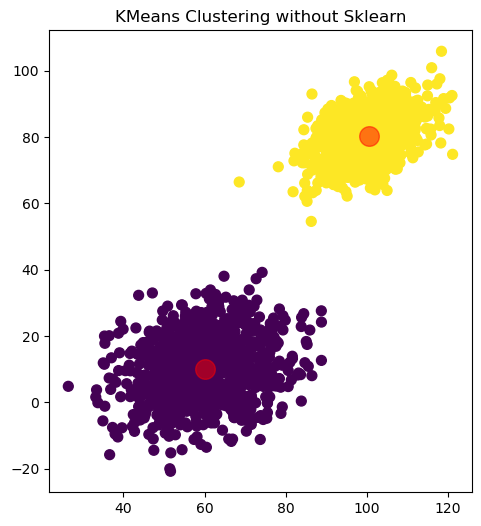

In [7]:
# Applying the custom KMeans algorithm
kmeans_from_scratch = KMeans()
kmeans_from_scratch.fit(data, k=2)

# Plotting the data and the centroids
plt.figure(figsize=(12, 6))

# KMeans from scratch
plt.subplot(1, 2, 1)
# Predicting cluster for each data point
cluster_assignments = [kmeans_from_scratch.predict(point) for point in data]
plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments, s=50, cmap='viridis')
plt.scatter([x[0] for x in kmeans_from_scratch.centroids], [x[1] for x in kmeans_from_scratch.centroids], c='red', s=200, alpha=0.5)
plt.title('KMeans Clustering without Sklearn')

plt.show()

C:\Users\padma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


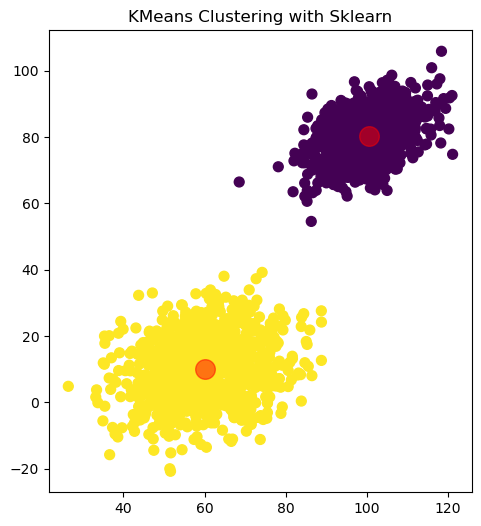

In [4]:
from sklearn.cluster import KMeans as KM

# Applying Sklearn's KMeans algorithm
kmeans_sklearn = KM(n_clusters=2, random_state=0)
kmeans_sklearn.fit(data)

# Plotting the data and the centroids
plt.figure(figsize=(12, 6))

# Sklearn KMeans
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=kmeans_sklearn.predict(data), s=50, cmap='viridis')
plt.scatter(kmeans_sklearn.cluster_centers_[:, 0], kmeans_sklearn.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans Clustering with Sklearn')

plt.show()

In [5]:
data

array([[ 48.86652569,  -6.19510712],
       [ 66.59138118, -11.75392483],
       [ 39.35311   ,   1.71480603],
       ...,
       [ 99.61501215,  75.71189786],
       [ 89.59039305,  69.35357991],
       [ 93.81778931,  67.52185131]])

# Is k-means guaranteed to provide you a unique solution?

### K-means clustering doesn't always give the unique solution. This is because it often starts by picking points in the data randomly, and these starting points can change the final groups it makes. Also, k-means can sometimes find solutions that aren't the best possible. If there are outliers, or very unusual data points, they can affect where k-means puts the center of a group. Sometimes a data point might be the same distance from two centers, and this can make the results vary. Because of these reasons, running k-means more than once can give different answers. running it several times and choosing the answer seems to work best.

# Part 2 PCA

In [8]:
class FeatureReduction():
    
    def __init__(self):
        self.model_params = {}
    
    def fit(self, data):
        pass
    
    def predict(self, data):
        pass
    

class PrincipleComponentAnalysis(FeatureReduction):
    '''self.model_params is where you will save your principle components (up to LoV)'''
    ''' Its useful to use a projection matrix as your only param'''
    
    def fit(self, data, thresh=0.95, plot_var = True):
        '''Find the principle components of your data'''
        
        # Standardizing the data
        stand_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
        # Computing the covariance matrix
        cov_matrix = np.cov(stand_data.T)
        # Computing eigenvalues and eigenvectors
        eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
        # Sorting the eigenvalues and eigenvectors to understand the principal components
        idx = eigen_values.argsort()[::-1]   
        eigen_values = eigen_values[idx]
        eigen_vectors = eigen_vectors[:, idx]
        # Calculate the variance explained and cumulative variance explained
        variance_explained = self.calc_variance_explained(eigen_values)
        # Determine the number of principal components to retain
        cum_var_explained = np.cumsum(variance_explained)
        num_components = np.where(cum_var_explained >= thresh)[0][0] + 1
        # Select the top principal components
        self.model_params['Projection Matrix'] = eigen_vectors[:, :num_components]
        
        
        
    def predict(self, data):
        ''' You can change this function if you want'''
        # Standardizing the data
        stand_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
        return stand_data.dot(self.model_params['Projection Matrix'])
    
    def calc_variance_explained(self, eigen_values):
        '''Input: list of eigen values
           Output: list of normalized values corresponding to percentage of information an eigen value contains'''
        '''Your code here'''
        
        total = sum(eigen_values)
        variance_explained = [(i / total) for i in sorted(eigen_values, reverse=True)]
        
        '''Stop Coding here'''
        return variance_explained

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.columns = ["sepal length", "sepal width", "petal length", "petal width", "species"]
# df.head()
features = ["sepal length", "sepal width", "petal length", "petal width"]
X = df[features]

In [10]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler

# Appling PCA from Scratch
pca_from_scratch = PrincipleComponentAnalysis()
pca_from_scratch.fit(X, thresh=0.95)
my_projection_matrix = pca_from_scratch.model_params['Projection Matrix']

# Appling sklearn PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
sklearn_pca = sklearnPCA(n_components=0.95)
sklearn_pca.fit(X_scaled)
sklearn_projection_matrix = sklearn_pca.components_.T

(my_projection_matrix, sklearn_projection_matrix)

(array([[ 0.52237162, -0.37231836],
        [-0.26335492, -0.92555649],
        [ 0.58125401, -0.02109478],
        [ 0.56561105, -0.06541577]]),
 array([[ 0.52237162,  0.37231836],
        [-0.26335492,  0.92555649],
        [ 0.58125401,  0.02109478],
        [ 0.56561105,  0.06541577]]))

# Why is it important to standardize your data before PCA?

### Standardizing data is crucial before doing PCA because PCA looks for directions where the data varies the most. If the data isn't standardized, variables measured at larger scales will unfairly influence the PCA result, making it seem like they have more variance. By standardizing, we ensure every variable is treated equally, regardless of their original scale. This way, PCA can correctly identify the most important patterns in the data, based on the actual structure, not just because of different units of measurement.

# Part 3 SVM

In [11]:
# importing the dataset
df = pd.read_csv("pokemon_dataset.csv")
df.head()

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total,Legendary
0,Bulbasaur,NaN,GRASS,POISON,49,49,45,65,65,45,318,NaN
1,Ivysaur,NaN,GRASS,POISON,62,63,60,80,80,60,405,NaN
2,Venusaur,NaN,GRASS,POISON,82,83,80,100,100,80,525,NaN
3,Venusaur,Mega Venusaur,GRASS,POISON,100,123,80,122,120,80,625,NaN
4,Charmander,NaN,FIRE,NaN,52,43,39,60,50,65,309,NaN


## Data Exploration

In [12]:
df.describe()

,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,80.466986,74.661244,70.067943,73.022010,72.288995,68.807656,439.314833
std,32.413665,31.237903,26.671411,32.724797,28.074148,30.210094,121.970701
min,5.000000,5.000000,1.000000,10.000000,20.000000,5.000000,175.000000
25%,55.000000,50.000000,50.000000,50.000000,50.000000,45.000000,330.000000
50%,77.000000,70.000000,68.000000,65.000000,70.000000,65.000000,458.000000
75%,100.000000,90.000000,82.000000,95.000000,90.000000,90.000000,515.000000
max,190.000000,250.000000,255.000000,194.000000,250.000000,200.000000,1125.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            1045 non-null   object
 1   Name2           175 non-null    object
 2   Primary Type    1045 non-null   object
 3   Secondary type  553 non-null    object
 4   Attack          1045 non-null   int64 
 5   Defense         1045 non-null   int64 
 6   HP              1045 non-null   int64 
 7   Sp.Attack       1045 non-null   int64 
 8   Sp.Defense      1045 non-null   int64 
 9   Speed           1045 non-null   int64 
 10  Total           1045 non-null   int64 
 11  Legendary       105 non-null    object
dtypes: int64(7), object(5)
memory usage: 98.1+ KB


## Preprocessing

In [14]:
# filling the missing values
df['Secondary type'].fillna('None', inplace= True)
df['Legendary'].fillna('No', inplace=True)

df.head()

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total,Legendary
0,Bulbasaur,NaN,GRASS,POISON,49,49,45,65,65,45,318,No
1,Ivysaur,NaN,GRASS,POISON,62,63,60,80,80,60,405,No
2,Venusaur,NaN,GRASS,POISON,82,83,80,100,100,80,525,No
3,Venusaur,Mega Venusaur,GRASS,POISON,100,123,80,122,120,80,625,No
4,Charmander,NaN,FIRE,None,52,43,39,60,50,65,309,No


In [15]:
# dropping the name and name2 as mentioned
df.drop(columns=['Name', 'Name2'], inplace=True)
df.head()

,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total,Legendary
0,GRASS,POISON,49,49,45,65,65,45,318,No
1,GRASS,POISON,62,63,60,80,80,60,405,No
2,GRASS,POISON,82,83,80,100,100,80,525,No
3,GRASS,POISON,100,123,80,122,120,80,625,No
4,FIRE,None,52,43,39,60,50,65,309,No


In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Encoding categorical variables
categorical_features = ['Primary Type', 'Secondary type']
categorical_transformer = OneHotEncoder()

# Scaling numerical variables
numerical_features = ['Attack', 'Defense', 'HP', 'Sp.Attack', 'Sp.Defense', 'Speed', 'Total']
numerical_transformer = StandardScaler()

In [17]:
from sklearn.compose import ColumnTransformer

# Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [18]:
from sklearn.model_selection import train_test_split

# Splitting the data
X = df.drop('Legendary', axis=1)
y = df['Legendary'].map({'Yes': 1, 'No': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating SVM

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Creating the pipeline with SVM
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC())])

In [20]:
# Hyperparameter tuning
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__kernel': ['linear', 'rbf', 'poly']
}

In [21]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy', verbose=2)

In [22]:
# Fitting the grid search to the training data
grid_search.fit(X_train, y_train)

# Retrieving the best parameters and score
best_params_revised = grid_search.best_params_
best_score_revised = grid_search.best_score_

best_params_revised, best_score_revised

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classif

({'classifier__C': 10,
  'classifier__gamma': 'auto',
  'classifier__kernel': 'rbf'},
 0.9473410322212719)

# Approach

1. **Data Exploration**: This step involved understanding the dataset's structure and distributions. I analyzed both numerical attributes (like Attack, Defense, and Speed) and categorical attributes (like Primary and Secondary Types). This helped in identifying relevant features for the classification task.

2. **Preprocessing**: First, missing values were handled, particularly in the 'Secondary type' and 'Legendary' columns. Categorical variables were encoded using OneHotEncoder to transform them into a format suitable for the SVM model. Numerical features were normalized using StandardScaler to ensure that all features contributed equally to the model, preventing any one feature with a larger scale from dominating the model's decision-making process.

3. **Classifier Validation and Hyperparameter Tuning**: The options considered for kernel included linear, RBF (Radial Basis Function), and polynomial kernels. The linear kernel is ideal for linearly separable data, but it might be too simplistic for complex datasets. The RBF and polynomial kernels are better for capturing non-linear relationships in data. After conducting a grid search for hyperparameter tuning, the RBF kernel was selected due to its effectiveness in balancing complexity and performance, particularly in scenarios where the relationship between features is not linear. The grid search also helped in determining the optimal regularization parameter (C=10) and the gamma value ('auto'), leading to an accuracy score of approximately 94.73%.